In [16]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import csv
in_data =pd.read_csv('./Csv Files/InputData.csv')
in_data

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
279995,279996,9955481,57,13,single,rented,no,Statistician,Eluru[25],Andhra Pradesh,5,10,0
279996,279997,2917765,47,9,single,rented,no,Technical writer,Ratlam,Madhya Pradesh,9,14,1
279997,279998,8082415,24,5,single,rented,no,Lawyer,Mira-Bhayandar,Maharashtra,4,13,0
279998,279999,9474180,51,13,single,rented,yes,Chartered Accountant,Bhilai,Chhattisgarh,13,14,0


# Filtering data by income and removing outliers

In [17]:
import pandas as pd


# Define income buckets and corresponding desired risk flag ratios
income_buckets = [
    (0, 1000000, 2),
    (1000000, 2000000, 3),
    (2000000, 3000000, 6),
    (3000000, 4000000, 10),
    (4000000, 5000000, 20),
    (5000000, 6000000, 30),
    (6000000, 7000000, 40),
    (7000000, 8000000, 50),
    (8000000, 9000000, 55),
    (9000000, 10000000, 60)
]

# Function to filter DataFrame based on income buckets and adjust risk flag ratios
def filter_data(df):
    filtered_rows = []
    
    for start, end, target_ratio in income_buckets:
        # Filter rows within the current income bucket
        subset = df[(df['Income'] >= start) & (df['Income'] < end)]
        
        # Calculate current count of risk=0 and risk=1
        count_0 = (subset['Risk_Flag'] == 0).sum()
        count_1 = (subset['Risk_Flag'] == 1).sum()
        
        # Calculate desired counts based on the target ratio
        total_count = count_0 + count_1
        desired_count_1 = int(total_count / (target_ratio + 1))
        desired_count_0 = int(total_count - desired_count_1)
        
        if count_0 > desired_count_0:
            # Calculate number of excess risk=0 entries to remove
            to_remove_0 = count_0 - desired_count_0
            # Identify indices of excess risk=0 rows to remove
            indices_to_remove_0 = subset[subset['Risk_Flag'] == 0].index[:to_remove_0]
            # Drop excess risk=0 rows from the subset
            subset = subset.drop(indices_to_remove_0)
        
        elif count_1 > desired_count_1:
            # Calculate number of excess risk=1 entries to remove
            to_remove_1 = count_1 - desired_count_1
            # Identify indices of excess risk=1 rows to remove
            indices_to_remove_1 = subset[subset['Risk_Flag'] == 1].index[:to_remove_1]
            # Drop excess risk=1 rows from the subset
            subset = subset.drop(indices_to_remove_1)
        
        # Append filtered subset to the list
        filtered_rows.append(subset)
    
    # Concatenate all filtered subsets back into a single DataFrame
    filtered_df = pd.concat(filtered_rows)
    
    return filtered_df

# Apply filtering to the input DataFrame
filtered_data = filter_data(in_data)

# Display the filtered DataFrame
#print(filtered_data)


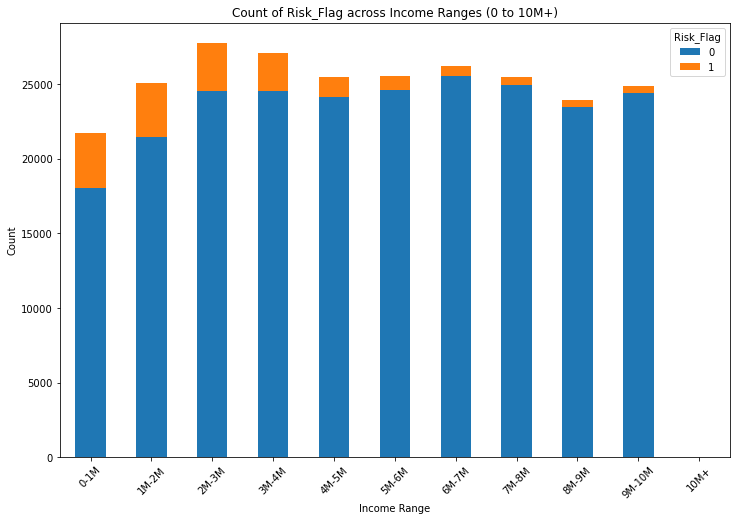


Table showing Risk_Flag counts and ratio (0:1) across Income Ranges:
              Risk_Flag 0 Count  Risk_Flag 1 Count  Ratio (0:1)
Income Range                                                   
0-1M                      18032               3717     4.851224
1M-2M                     21481               3602     5.963631
2M-3M                     24547               3180     7.719182
3M-4M                     24547               2540     9.664173
4M-5M                     24140               1311    18.413425
5M-6M                     24616                905    27.200000
6M-7M                     25504                702    36.330484
7M-8M                     24920                557    44.739677
8M-9M                     23480                481    48.814969
9M-10M                    24377                457    53.341357
10M+                          0                  0          NaN


In [18]:
out_data = filtered_data.copy()
df1 = out_data.copy()

# Define income ranges and labels
income_bins = [0, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 10000000, float('inf')]
income_labels = ['0-1M', '1M-2M', '2M-3M', '3M-4M', '4M-5M', '5M-6M', '6M-7M', '7M-8M', '8M-9M', '9M-10M', '10M+']

# Cut the 'Income' column into income ranges
df1['Income Range'] = pd.cut(df1['Income'], bins=income_bins, labels=income_labels, right=False)

# Group by 'Income Range' and 'Risk_Flag', then count occurrences
grouped_counts = df1.groupby(['Income Range', 'Risk_Flag']).size().unstack(fill_value=0)

# Plotting the grouped bar chart
grouped_counts.plot(kind='bar', stacked=True, figsize=(12, 8))

# Add labels and title
plt.xlabel('Income Range')
plt.ylabel('Count')
plt.title('Count of Risk_Flag across Income Ranges (0 to 10M+)')
plt.xticks(rotation=45)
plt.legend(title='Risk_Flag')

# Show plot
plt.show()



# Define income ranges and labels
income_bins = [0, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 10000000, float('inf')]
income_labels = ['0-1M', '1M-2M', '2M-3M', '3M-4M', '4M-5M', '5M-6M', '6M-7M', '7M-8M', '8M-9M', '9M-10M', '10M+']

# Cut the 'Income' column into income ranges
out_data['Income Range'] = pd.cut(out_data['Income'], bins=income_bins, labels=income_labels, right=False)

# Group by 'Income Range' and 'Risk_Flag', then count occurrences
grouped_counts = out_data.groupby(['Income Range', 'Risk_Flag']).size().unstack(fill_value=0)

# Add missing columns to handle all possible Risk_Flag values (0 and 1)
grouped_counts = grouped_counts.reindex(columns=[0, 1], fill_value=0)

# Calculate the ratio of Risk_Flag 0 to 1
grouped_counts['Ratio (0:1)'] = grouped_counts[0] / grouped_counts[1]

# Display the table with counts and ratios
table = grouped_counts[[0, 1, 'Ratio (0:1)']]
table.columns = ['Risk_Flag 0 Count', 'Risk_Flag 1 Count', 'Ratio (0:1)']
print("\nTable showing Risk_Flag counts and ratio (0:1) across Income Ranges:")
print(table)


# Balancing the data

In [19]:
import pandas as pd
import numpy as np

# # Assuming you have the input data in a DataFrame named `in_data`

# Function to balance the ratio of Risk_Flag=0 to Risk_Flag=1 by randomly deleting excess Risk_Flag=0 rows
def balance_risk_flag_ratio(df):
    # Calculate counts of Risk_Flag=0 and Risk_Flag=1
    count_0 = (df['Risk_Flag'] == 0).sum()
    count_1 = (df['Risk_Flag'] == 1).sum()
    
    if count_0 > count_1:
        # Calculate number of excess Risk_Flag=0 rows to remove
        to_remove = count_0 - count_1
        # Get indices of excess Risk_Flag=0 rows
        indices_to_remove = df[df['Risk_Flag'] == 0].sample(n=to_remove, random_state=42).index
        # Drop excess rows from the DataFrame
        df = df.drop(indices_to_remove)
    
    elif count_1 > count_0:
        # Calculate number of excess Risk_Flag=1 rows to remove (though this scenario should not occur in a balanced dataset)
        to_remove = count_1 - count_0
        # Get indices of excess Risk_Flag=1 rows
        indices_to_remove = df[df['Risk_Flag'] == 1].sample(n=to_remove, random_state=42).index
        # Drop excess rows from the DataFrame
        df = df.drop(indices_to_remove)
    
    return df

balanced_data = balance_risk_flag_ratio(filtered_data)

# Display the balanced DataFrame
#print(balanced_data)


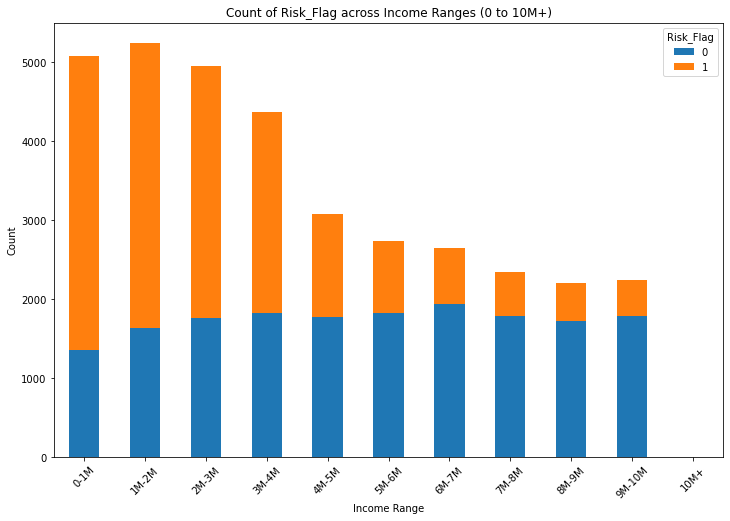


Table showing Risk_Flag counts and ratio (0:1) across Income Ranges:
              Risk_Flag 0 Count  Risk_Flag 1 Count  Ratio (0:1)
Income Range                                                   
0-1M                       1362               3717     0.366425
1M-2M                      1639               3602     0.455025
2M-3M                      1769               3180     0.556289
3M-4M                      1826               2540     0.718898
4M-5M                      1774               1311     1.353166
5M-6M                      1832                905     2.024309
6M-7M                      1943                702     2.767806
7M-8M                      1788                557     3.210054
8M-9M                      1731                481     3.598753
9M-10M                     1788                457     3.912473
10M+                          0                  0          NaN


In [20]:
out_data = balanced_data.copy()
df1 = out_data.copy()

# Define income ranges and labels
income_bins = [0, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 10000000, float('inf')]
income_labels = ['0-1M', '1M-2M', '2M-3M', '3M-4M', '4M-5M', '5M-6M', '6M-7M', '7M-8M', '8M-9M', '9M-10M', '10M+']

# Cut the 'Income' column into income ranges
df1['Income Range'] = pd.cut(df1['Income'], bins=income_bins, labels=income_labels, right=False)

# Group by 'Income Range' and 'Risk_Flag', then count occurrences
grouped_counts = df1.groupby(['Income Range', 'Risk_Flag']).size().unstack(fill_value=0)

# Plotting the grouped bar chart
grouped_counts.plot(kind='bar', stacked=True, figsize=(12, 8))

# Add labels and title
plt.xlabel('Income Range')
plt.ylabel('Count')
plt.title('Count of Risk_Flag across Income Ranges (0 to 10M+)')
plt.xticks(rotation=45)
plt.legend(title='Risk_Flag')

# Show plot
plt.show()



# Define income ranges and labels
income_bins = [0, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 10000000, float('inf')]
income_labels = ['0-1M', '1M-2M', '2M-3M', '3M-4M', '4M-5M', '5M-6M', '6M-7M', '7M-8M', '8M-9M', '9M-10M', '10M+']

# Cut the 'Income' column into income ranges
out_data['Income Range'] = pd.cut(out_data['Income'], bins=income_bins, labels=income_labels, right=False)

# Group by 'Income Range' and 'Risk_Flag', then count occurrences
grouped_counts = out_data.groupby(['Income Range', 'Risk_Flag']).size().unstack(fill_value=0)

# Add missing columns to handle all possible Risk_Flag values (0 and 1)
grouped_counts = grouped_counts.reindex(columns=[0, 1], fill_value=0)

# Calculate the ratio of Risk_Flag 0 to 1
grouped_counts['Ratio (0:1)'] = grouped_counts[0] / grouped_counts[1]

# Display the table with counts and ratios
table = grouped_counts[[0, 1, 'Ratio (0:1)']]
table.columns = ['Risk_Flag 0 Count', 'Risk_Flag 1 Count', 'Ratio (0:1)']
print("\nTable showing Risk_Flag counts and ratio (0:1) across Income Ranges:")
print(table)

In [21]:
balanced_data.to_csv('./Csv Files/SWAGAT_INPUT_income_dataset_balanced.csv', index=False)
filtered_data.to_csv('./Csv Files/SWAGAT_INPUT_income_dataset_non_balanced.csv', index=False)